In [9]:
import xarray as xr
from glob import glob
from matplotlib import pyplot as plt

In [2]:
run_dir = '../data/restart/C48/20160805.170000/rundir/'
restart_dir = 'RESTART/'

file_list = glob(run_dir + restart_dir + '*.nc')

In [3]:
for file in file_list:
    print(file)

../data/restart/C48/20160805.170000/rundir/RESTART/sfc_data.tile3.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_tracer.res.tile2.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_core.res.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_core.res.tile1.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_srf_wnd.res.tile5.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_tracer.res.tile5.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_core.res.tile2.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_srf_wnd.res.tile6.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_srf_wnd.res.tile3.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_srf_wnd.res.tile4.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_core.res.tile5.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_srf_wnd.res.tile2.nc
../data/restart/C48/20160805.170000/rundir/RESTART/fv_core.res.tile6.nc
../data/restart/C48/20160805.170000/rundir/RESTART/phy

In [4]:
ds = xr.open_dataset(file_list[0])

In [15]:
ds.slmsk

<xarray.DataArray 'slmsk' (Time: 1, yaxis_1: 48, xaxis_1: 48)>
array([[[0., 1., ..., 0., 0.],
        [1., 1., ..., 0., 1.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]])
Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0 4.0 5.0 ... 44.0 45.0 46.0 47.0 48.0
  * yaxis_1  (yaxis_1) float64 1.0 2.0 3.0 4.0 5.0 ... 44.0 45.0 46.0 47.0 48.0
  * Time     (Time) float64 1.0
Attributes:
    long_name:  slmsk
    units:      none
    checksum:   C360000000000000

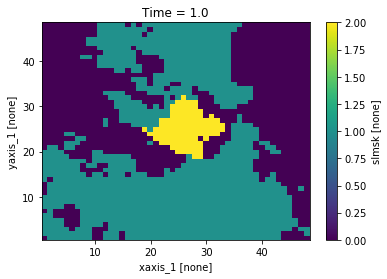

In [16]:
fig = plt.figure()
ds['slmsk'].sel(Time=1).plot()

In [21]:
# from src.data.cubedsphere import open_cubed_sphere
# timestep = 
sfc_data = xr.open_mfdataset('../data/restart/C48/20160805.170000/rundir/RESTART/sfc_data*.nc', concat_dim='tile')

/home/brianh/miniconda3/envs/fv3net/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/brianh/miniconda3/envs/fv3net/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  coords=coords)


In [29]:
sfc_data.dims

Frozen(SortedKeysDict({'xaxis_1': 48, 'yaxis_1': 48, 'zaxis_1': 4, 'Time': 1, 'tile': 6}))

In [23]:
ds = xr.open_dataset('../data/restart/C48/20160805.170000/rundir/RESTART/fv_core.res.nc')

In [27]:
ds['bk']

<xarray.DataArray 'bk' (Time: 1, xaxis_1: 80)>
array([[0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.001066, 0.004129,
        0.009007, 0.015543, 0.023599, 0.033055, 0.043801, 0.055741, 0.068786,
        0.082853, 0.09787 , 0.113764, 0.130471, 0.147927, 0.166075, 0.184856,
        0.204217, 0.224105, 0.244472, 0.265267, 0.286445, 0.30796 , 0.32977 ,
        0.351832, 0.374106, 0.396553, 0.419136, 0.441819, 0.464568, 0.48735 ,
        0.510134, 0.53289 , 0.555589, 0.578207, 0.600716, 0.623094, 0.645294,
        0.667268, 0.688965, 0.710333, 0.731323, 0.751884, 0.771965, 0.791517,
        0.810491, 0.828839, 0.846513, 0.863468, 0.879658, 0.895042, 0.909578,
        0.923226, 0.935951, 0.947716, 0.958489, 0.968241, 0.976945, 0.984575,
        0.991113, 0.996537, 1.      ]])
Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0

In [129]:
gs = xr.open_dataset('../data/raw/coarse-grid-and-orography-data/C48/grid_spec.nc')
gs

<xarray.Dataset>
Dimensions:        (ncontact: 12, ntiles: 6)
Dimensions without coordinates: ncontact, ntiles
Data variables:
    mosaic         |S255 ...
    gridlocation   |S255 ...
    gridfiles      (ntiles) |S255 ...
    gridtiles      (ntiles) |S255 ...
    contacts       (ncontact) |S255 ...
    contact_index  (ncontact) |S255 ...
Attributes:
    grid_version:  0.2
    code_version:  $Name: fre-nctools-bronx-10 $
    history:       /lustre/f1/unswept/Shannon.Rees/fv3_gfs_preproc/MAKE_IC/SC...

In [144]:
gs1 = xr.open_dataset('../data/raw/coarse-grid-and-orography-data/C48/C48_grid.tile6.nc')

In [145]:
gs1.x

<xarray.DataArray 'x' (nyp: 97, nxp: 97)>
array([[215.      , 214.217217, 213.427307, ..., 126.572693, 125.782783,
        125.      ],
       [215.782783, 215.      , 214.209751, ..., 125.790249, 125.      ,
        124.217217],
       [216.572693, 215.790249, 215.      , ..., 125.      , 124.209751,
        123.427307],
       ...,
       [303.427307, 304.209751, 305.      , ...,  35.      ,  35.790249,
         36.572693],
       [304.217217, 305.      , 305.790249, ...,  34.209751,  35.      ,
         35.782783],
       [305.      , 305.782783, 306.572693, ...,  33.427307,  34.217217,
         35.      ]])
Dimensions without coordinates: nyp, nxp
Attributes:
    standard_name:  geographic_longitude
    units:          degree_east

In [138]:
grid = xr.open_mfdataset('../data/raw/coarse-grid-and-orography-data/C48/C48_grid.tile*.nc', concat_dim = 'tile')

/home/brianh/miniconda3/envs/fv3net/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/brianh/miniconda3/envs/fv3net/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  coords=coords)


In [139]:
grid

<xarray.Dataset>
Dimensions:   (nx: 96, nxp: 97, ny: 96, nyp: 97, tile: 6)
Coordinates:
  * tile      (tile) |S255 b'tile1' b'tile2' b'tile3' b'tile4' b'tile5' b'tile6'
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (tile, nyp, nxp) float64 dask.array<shape=(6, 97, 97), chunksize=(1, 97, 97)>
    y         (tile, nyp, nxp) float64 dask.array<shape=(6, 97, 97), chunksize=(1, 97, 97)>
    dx        (tile, nyp, nx) float64 dask.array<shape=(6, 97, 96), chunksize=(1, 97, 96)>
    dy        (tile, ny, nxp) float64 dask.array<shape=(6, 96, 97), chunksize=(1, 96, 97)>
    area      (tile, ny, nx) float64 dask.array<shape=(6, 96, 96), chunksize=(1, 96, 96)>
    angle_dx  (tile, nyp, nxp) float64 dask.array<shape=(6, 97, 97), chunksize=(1, 97, 97)>
    angle_dy  (tile, nyp, nxp) float64 dask.array<shape=(6, 97, 97), chunksize=(1, 97, 97)>
    arcx      (tile) |S255 b'small_circle' b'small_circle' ... b'small_circle'
Attributes:
    grid_version:  0.2
    code_ver

In [95]:
oro1 = xr.open_dataset('../data/raw/coarse-grid-and-orography-data/C48/oro_data.tile1.nc')
fig = plt.figure()
oro1.orog_raw

<xarray.DataArray 'orog_raw' (lat: 48, lon: 48)>
array([[3.567742e-02, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.153220e+01, 4.937246e-02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.445049e+02, 2.198566e-01, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.958062e-01],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        5.568882e-02, 5.087932e-02],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.764859e-01,
        9.566978e-01, 4.965884e-01]], dtype=float32)
Coordinates:
  * lon      (lon) float32 305.7829 307.3699 308.98584 ... 32.630085 34.217087
  * lat      (lat) float32 -34.891106 -33.414417 ... 33.414417 34.891106

<Figure size 432x288 with 0 Axes>

In [93]:
oro1.orog_filt.values

array([[1.9976081e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.1747414e+01, 7.4337173e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3611337e+02, 8.7778740e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.9193947e+01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        5.7786480e-02, 1.3185623e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.5652172e+01,
        2.6952898e+01, 1.8285444e+01]], dtype=float32)

In [126]:
import pandas as pd
from os.path import join
# Imports the Google Cloud client library
from google.cloud import storage

tiles = [1, 2, 3, 4, 5, 6]
bucket_name = 'vcm-ml-data'
def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    storage_client = storage.Client()
    bucket = storage.Bucket(storage_client, bucket_name)
    blob = storage.Blob(source_blob_name, bucket)
#     blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)
    
for tile in tiles:
    source_blob_name = f"2019-10-16-C3072-grid-spec/grid_spec.tile{tile}.nc"
    print(source_blob_name)
    destination_file_name = join('../data/tmp/', source_blob_name)
    download_blob(bucket_name, source_blob_name, destination_file_name)
    print(f"downloaded blob {tile}.")



TILES = range(1,7)
tile = pd.Index(TILES, name='tile')
gridc3072 = xr.open_mfdataset('../data/tmp/2019-10-16-C3072-grid-spec/*.nc', concat_dim=tile)

2019-10-16-C3072-grid-spec/grid_spec.tile1.nc
downloaded blob 1.
2019-10-16-C3072-grid-spec/grid_spec.tile2.nc
downloaded blob 2.
2019-10-16-C3072-grid-spec/grid_spec.tile3.nc
downloaded blob 3.
2019-10-16-C3072-grid-spec/grid_spec.tile4.nc
downloaded blob 4.
2019-10-16-C3072-grid-spec/grid_spec.tile5.nc
downloaded blob 5.
2019-10-16-C3072-grid-spec/grid_spec.tile6.nc
downloaded blob 6.


/home/brianh/miniconda3/envs/fv3net/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/brianh/miniconda3/envs/fv3net/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))
/home/brianh/miniconda3/envs/fv3net/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to o

In [127]:
TILES = range(1,7)
tile = pd.Index(TILES, name='tile')
gridc3072 = xr.open_mfdataset('../data/tmp/2019-10-16-C3072-grid-spec/*.nc', concat_dim=tile)

In [128]:
gridc3072

<xarray.Dataset>
Dimensions:    (grid_x: 3073, grid_xt: 3072, grid_y: 3073, grid_yt: 3072, tile: 6)
Coordinates:
  * grid_x     (grid_x) float64 1.0 2.0 3.0 ... 3.071e+03 3.072e+03 3.073e+03
  * grid_y     (grid_y) float64 1.0 2.0 3.0 ... 3.071e+03 3.072e+03 3.073e+03
  * grid_xt    (grid_xt) float64 1.0 2.0 3.0 ... 3.07e+03 3.071e+03 3.072e+03
  * grid_yt    (grid_yt) float64 1.0 2.0 3.0 ... 3.07e+03 3.071e+03 3.072e+03
  * tile       (tile) int64 1 2 3 4 5 6
Data variables:
    grid_lon   (tile, grid_y, grid_x) float32 dask.array<shape=(6, 3073, 3073), chunksize=(1, 3073, 3073)>
    grid_lat   (tile, grid_y, grid_x) float32 dask.array<shape=(6, 3073, 3073), chunksize=(1, 3073, 3073)>
    grid_lont  (tile, grid_yt, grid_xt) float32 dask.array<shape=(6, 3072, 3072), chunksize=(1, 3072, 3072)>
    grid_latt  (tile, grid_yt, grid_xt) float32 dask.array<shape=(6, 3072, 3072), chunksize=(1, 3072, 3072)>
    area       (tile, grid_yt, grid_xt) float32 dask.array<shape=(6, 3072, 3072), chunk